In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [5]:
train = df[:split_count].copy()
train.shape

(614, 9)

In [6]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [7]:
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
label_name = train.columns[-1]
label_name

'Outcome'

In [9]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y_train = train[label_name]
print(y_train.shape)
y_train.head() #vector

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [12]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_predict = model.predict(X_test) # prediction
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [16]:
X_test[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


[Text(191.06728964891042, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(64.15564467312349, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(12.970460048426151, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.485230024213076, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.242615012106538, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.727845036319614, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.485230024213076, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.970460048426151, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.45569007263923, 172.6729411764706, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(16.2130750

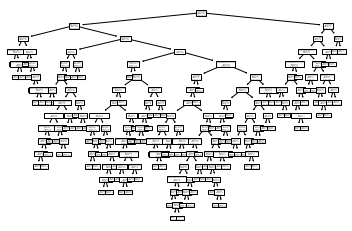

In [17]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

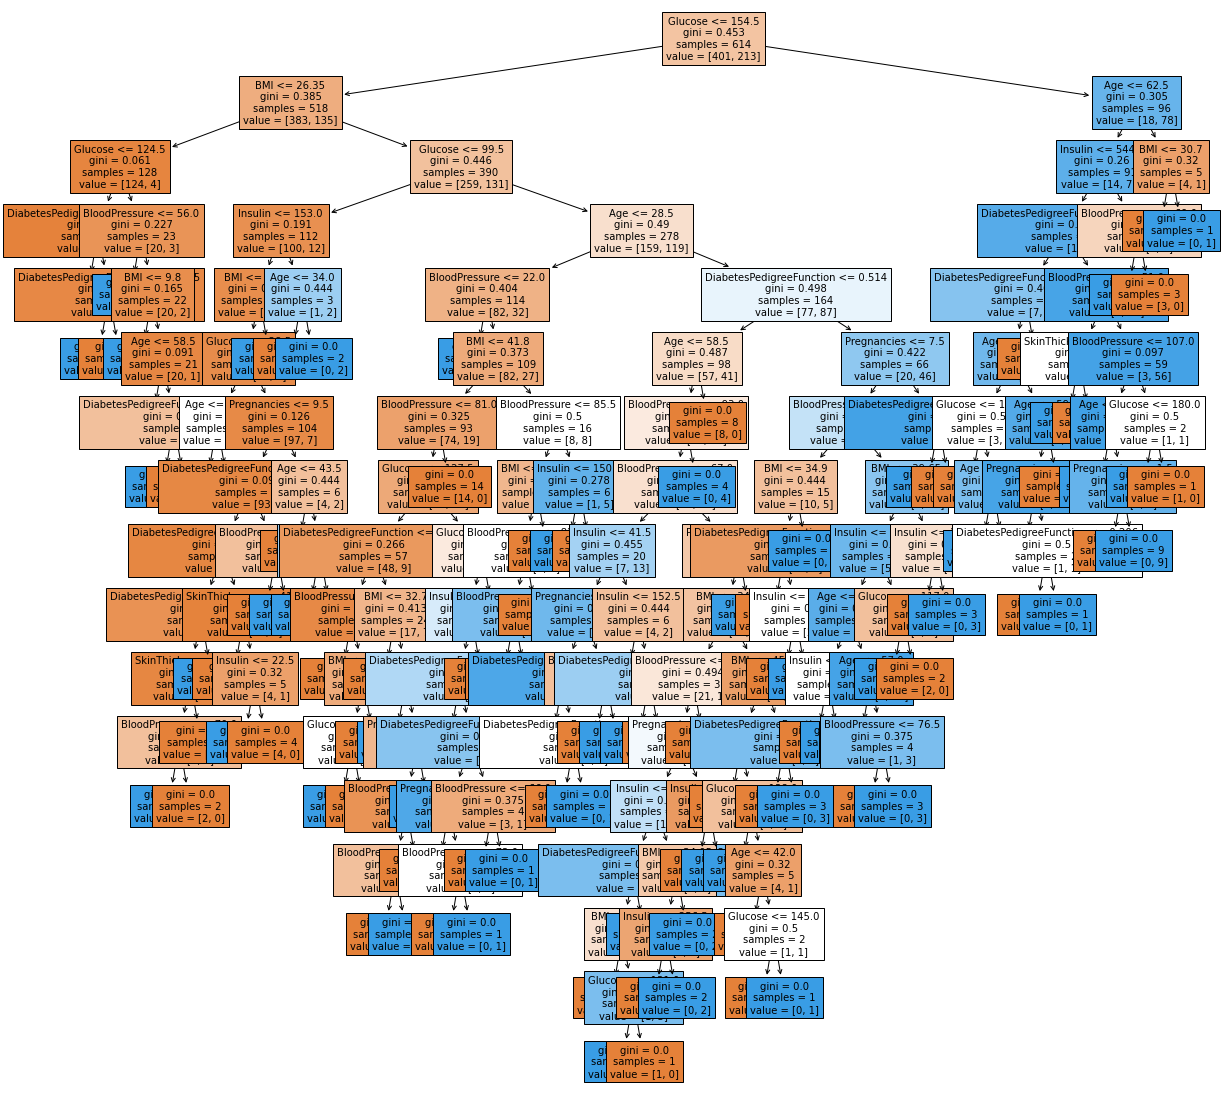

In [18]:
from sklearn.tree import plot_tree

#### Tree Visulization
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True, 
                           fontsize=10)

In [19]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names, filled=True)


In [20]:
model.feature_importances_

array([0.06105914, 0.29817122, 0.13727293, 0.00701298, 0.1030507 ,
       0.16824509, 0.12484161, 0.10034633])

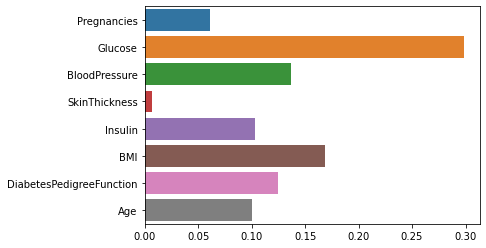

In [21]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [22]:
diff_count = abs(y_test - y_predict).sum()
diff_count

43

In [23]:
abs(y_test - y_predict).sum() / len(y_test)

0.2792207792207792

In [24]:
(len(y_test) - diff_count) / len(y_test) * 100 # 71% accuracy

72.07792207792207

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.7207792207792207

In [26]:
model.score(X_test, y_test) * 100

72.07792207792207

In [27]:
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [28]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [31]:
cols = feature_columns[1:]
cols


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [32]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

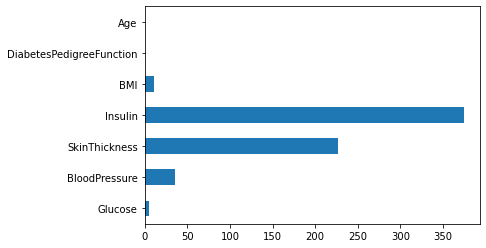

In [33]:
df_null.sum().plot.barh()

In [34]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

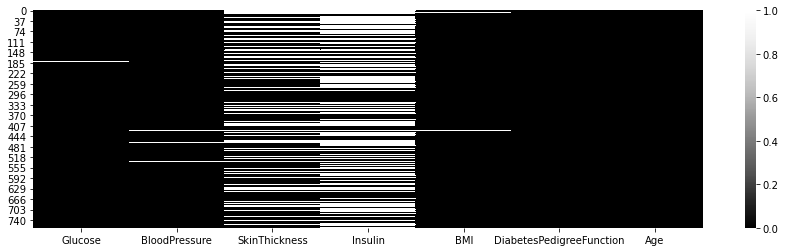

In [35]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

In [36]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [39]:
df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [40]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [41]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


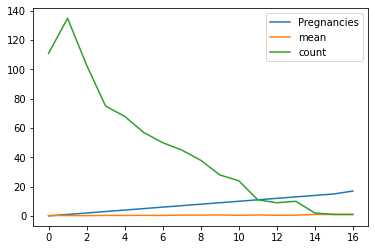

In [42]:
df_po.plot()

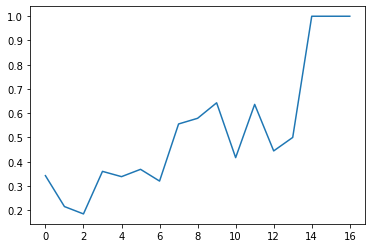

In [43]:
df_po["mean"].plot()

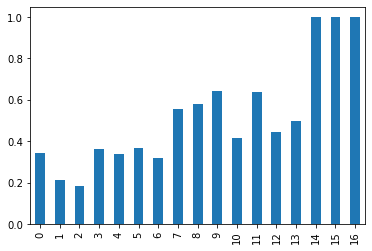

In [45]:
df_po["mean"].plot.bar()

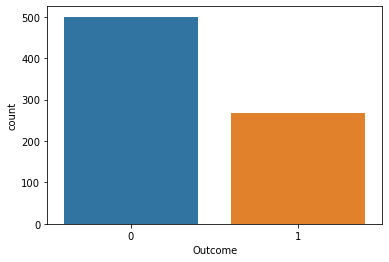

In [46]:
sns.countplot(data=df, x="Outcome")

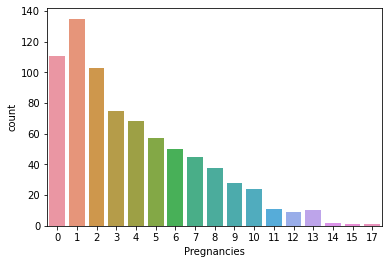

In [47]:
sns.countplot(data=df, x="Pregnancies")

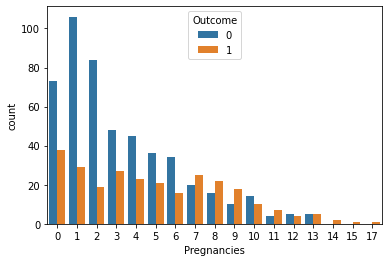

In [48]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [49]:
df["Pregnancies_high"] = df["Pregnancies"] > 6 #pregnancies high range
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


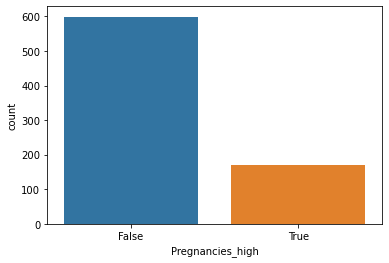

In [50]:
sns.countplot(data=df, x="Pregnancies_high")

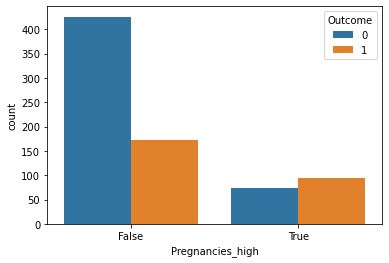

In [51]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

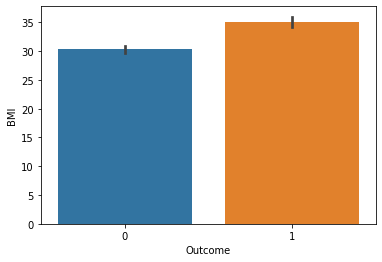

In [52]:
sns.barplot(data=df, x="Outcome", y="BMI")

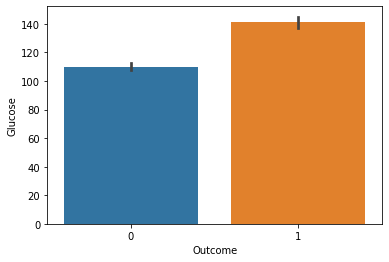

In [53]:
sns.barplot(data=df, x="Outcome", y="Glucose")

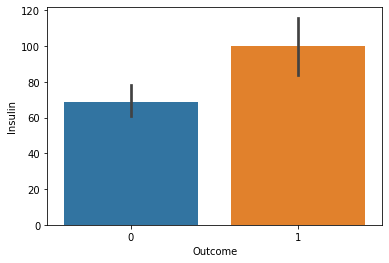

In [54]:
sns.barplot(data=df, x="Outcome", y="Insulin")

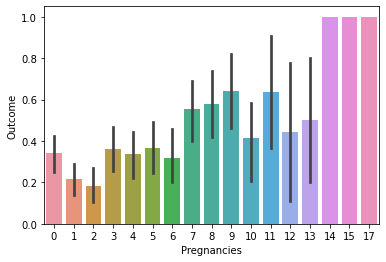

In [55]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

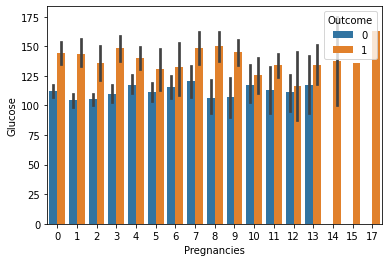

In [56]:
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")


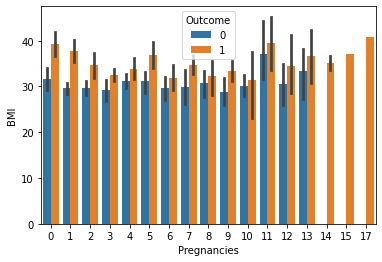

In [57]:
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")


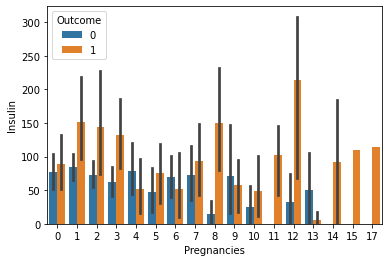

In [58]:
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")


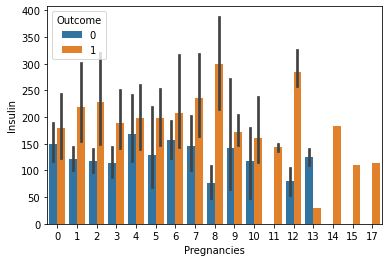

In [59]:
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


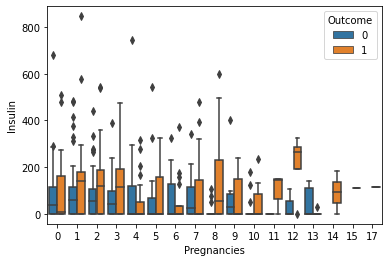

In [60]:
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")


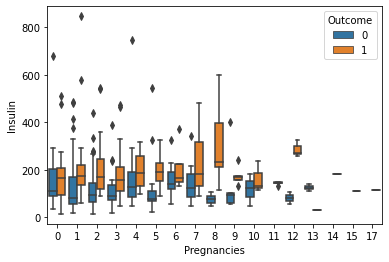

In [61]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")


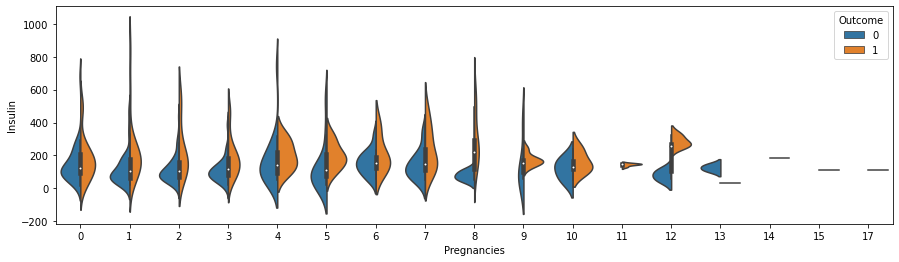

In [62]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

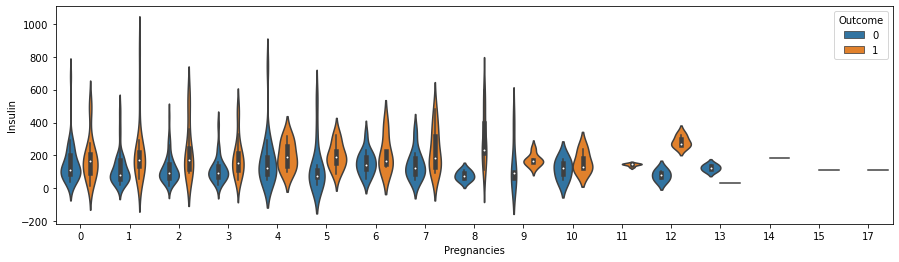

In [63]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

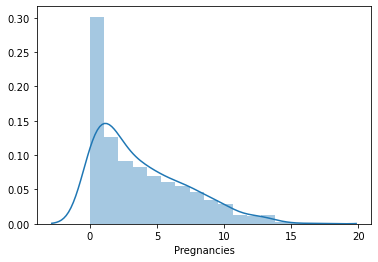

In [64]:
sns.distplot(df["Pregnancies"])

In [76]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

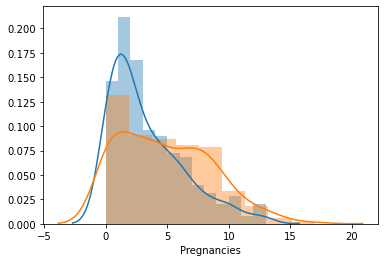

In [77]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

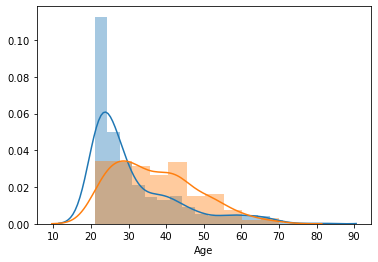

In [78]:
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

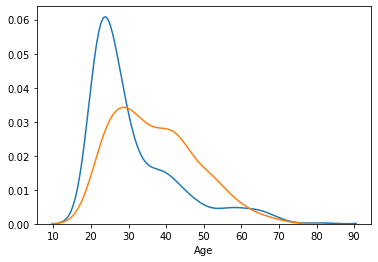

In [79]:
sns.distplot(df_0["Age"], hist=False)
sns.distplot(df_1["Age"], hist=False)

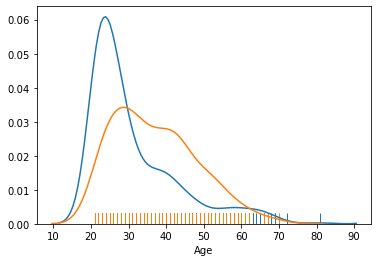

In [80]:
sns.distplot(df_0["Age"], hist=False, rug=True)
sns.distplot(df_1["Age"], hist=False, rug=True)

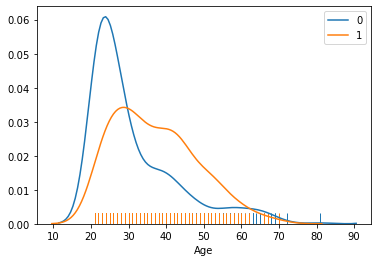

In [81]:
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

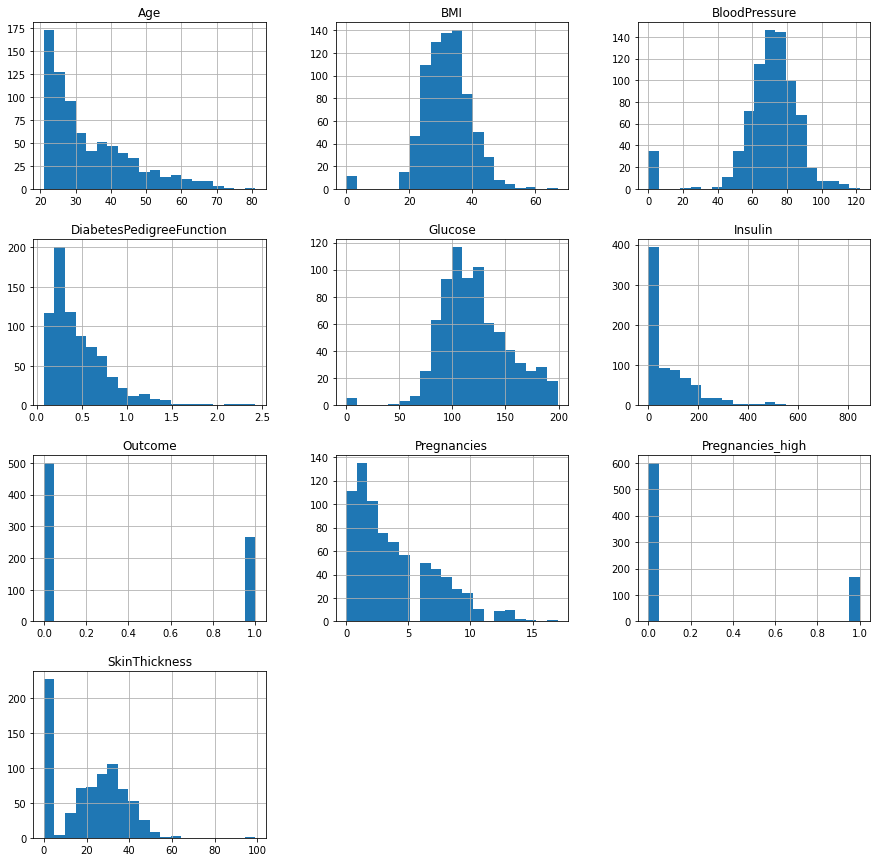

In [82]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

In [83]:
col_num = df.columns.shape
col_num

(10,)

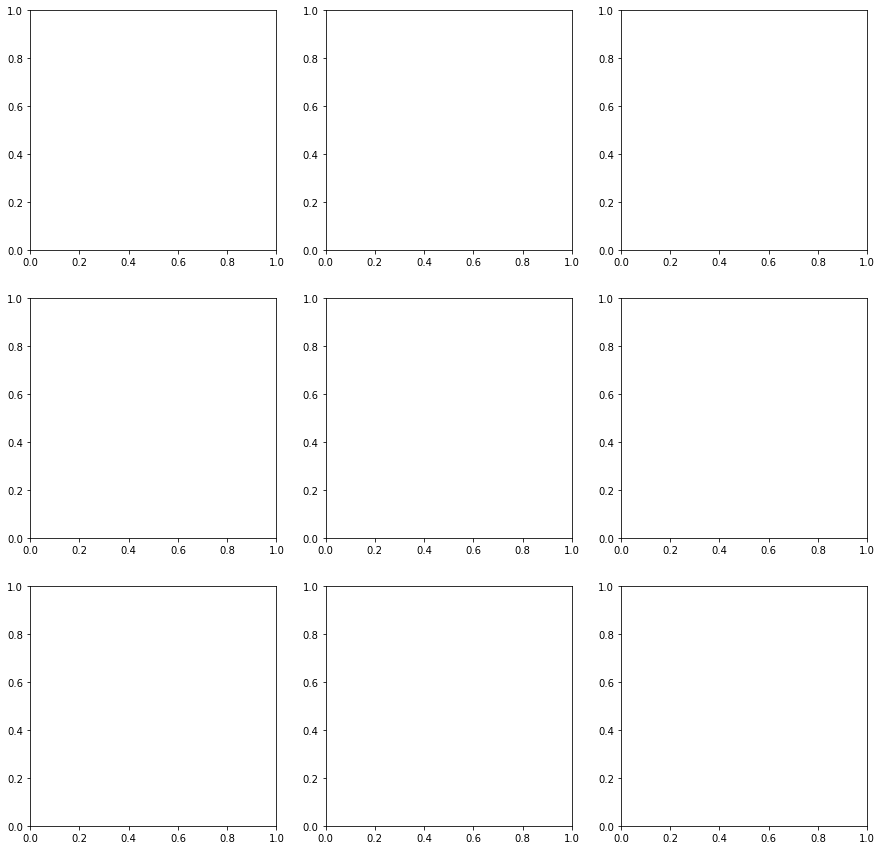

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

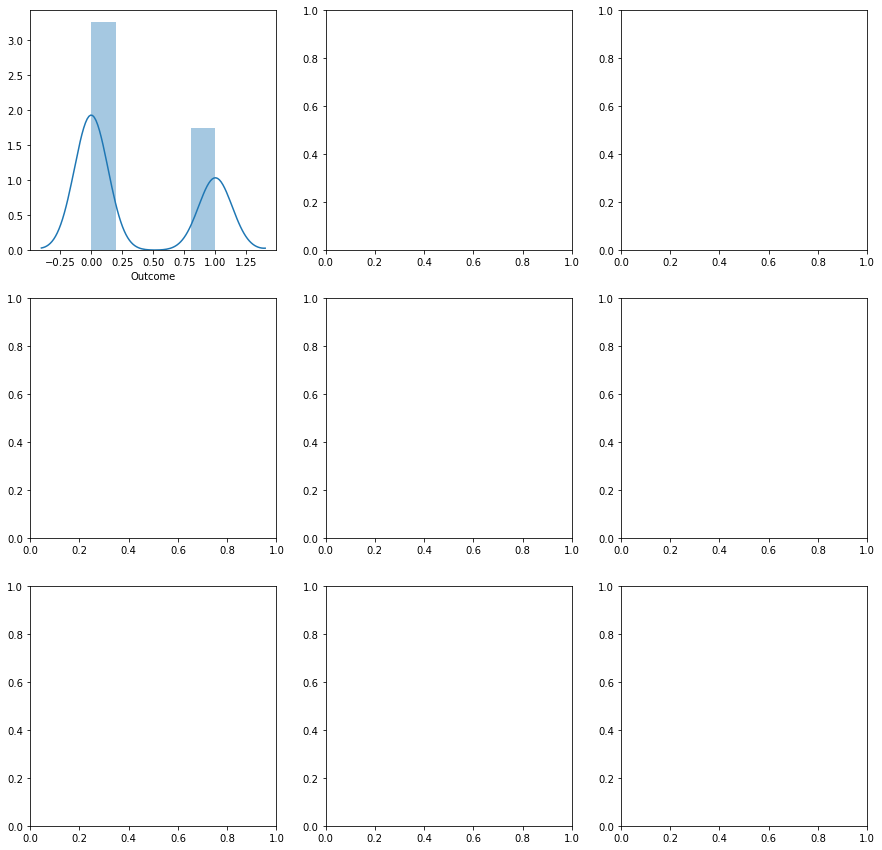

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.distplot(df["Outcome"], ax=axes[0][0])

0
1
2
3
4
5
6
7
8


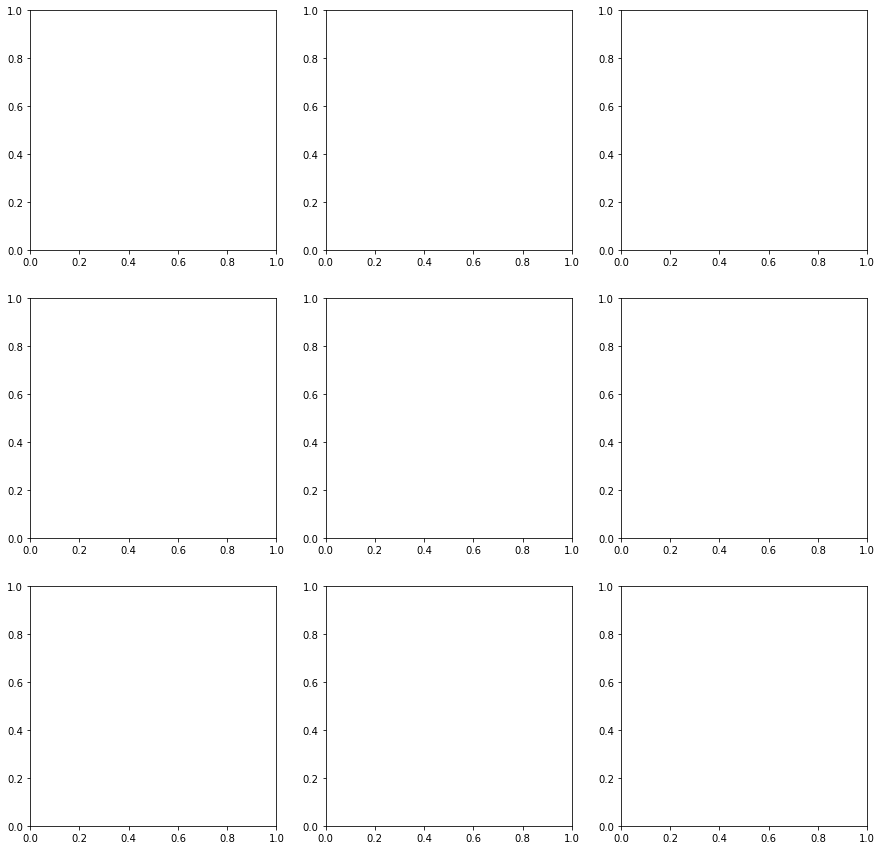

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(9):
    print(i)

In [87]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

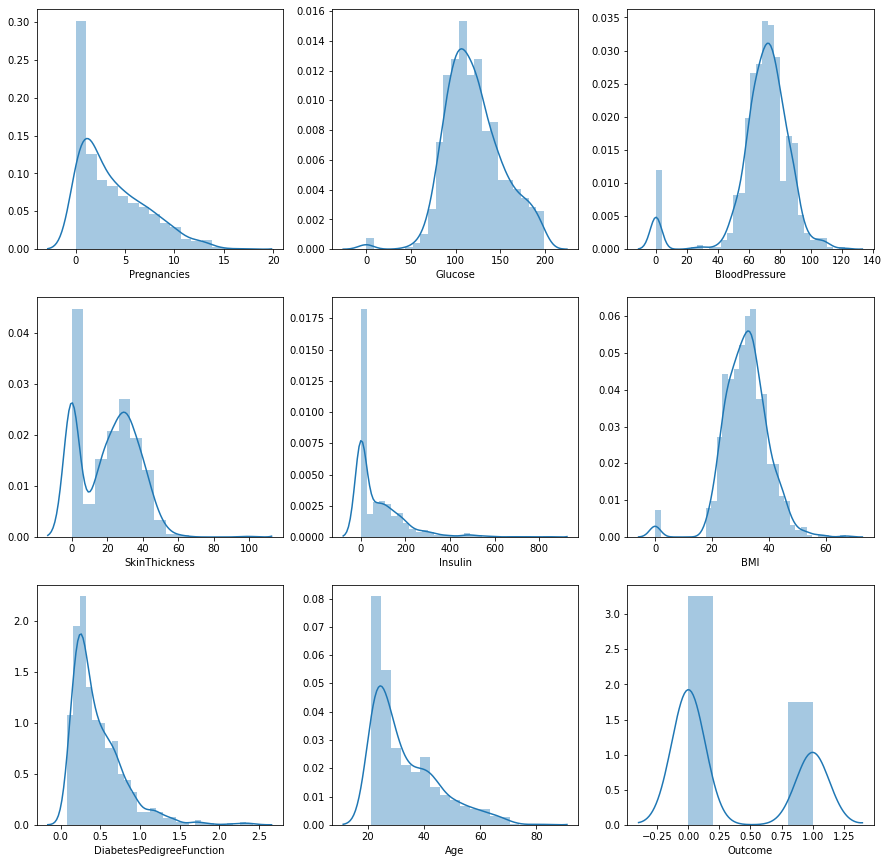

In [91]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

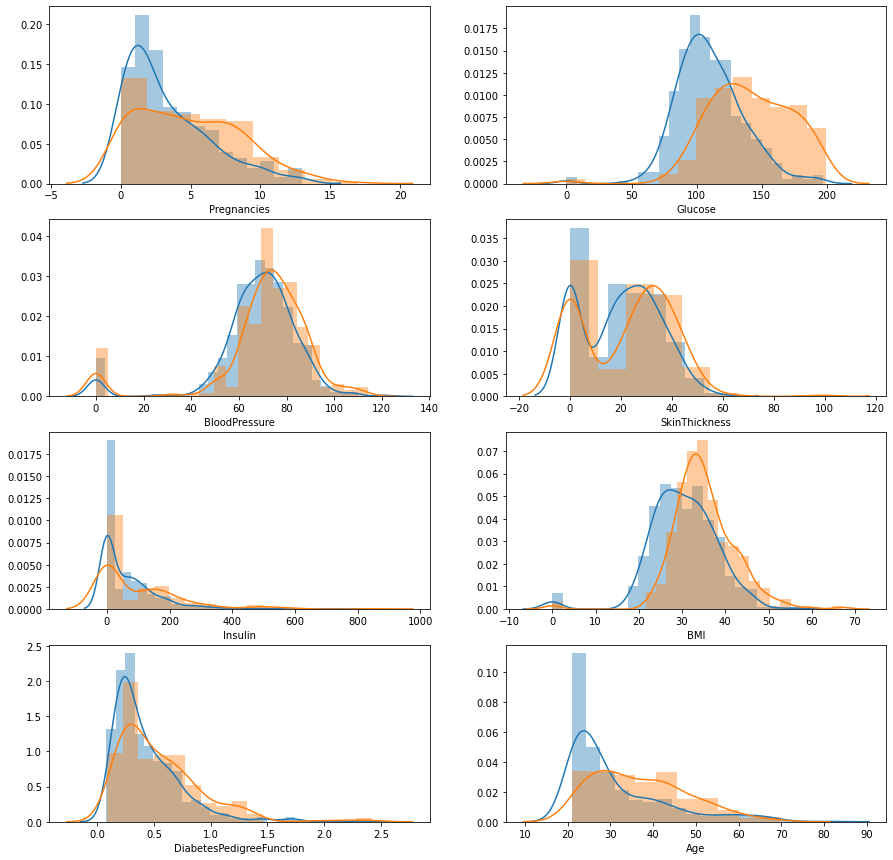

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2 
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

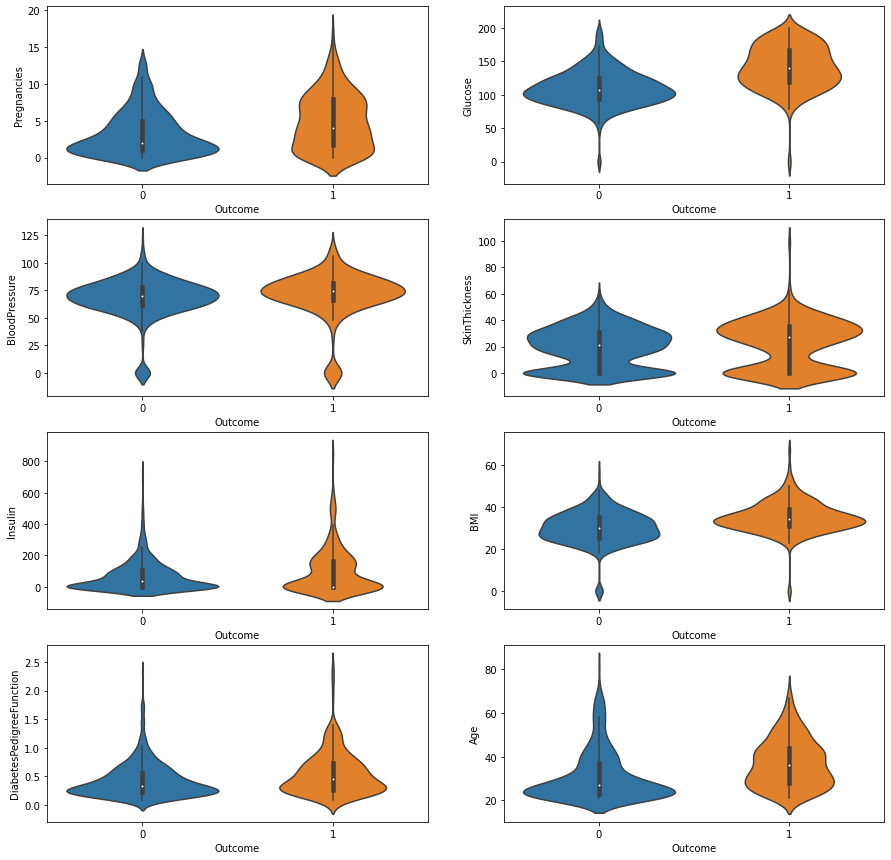

In [95]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

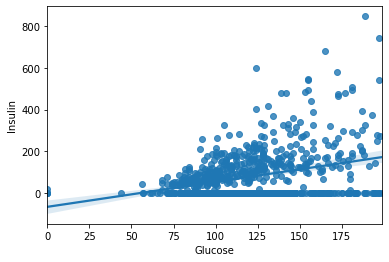

In [96]:
sns.regplot(data=df, x="Glucose", y="Insulin")

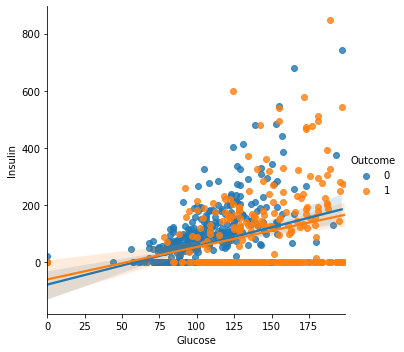

In [97]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

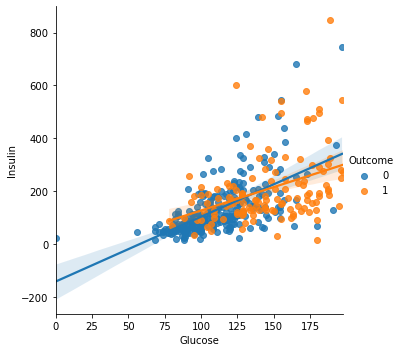

In [98]:
sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

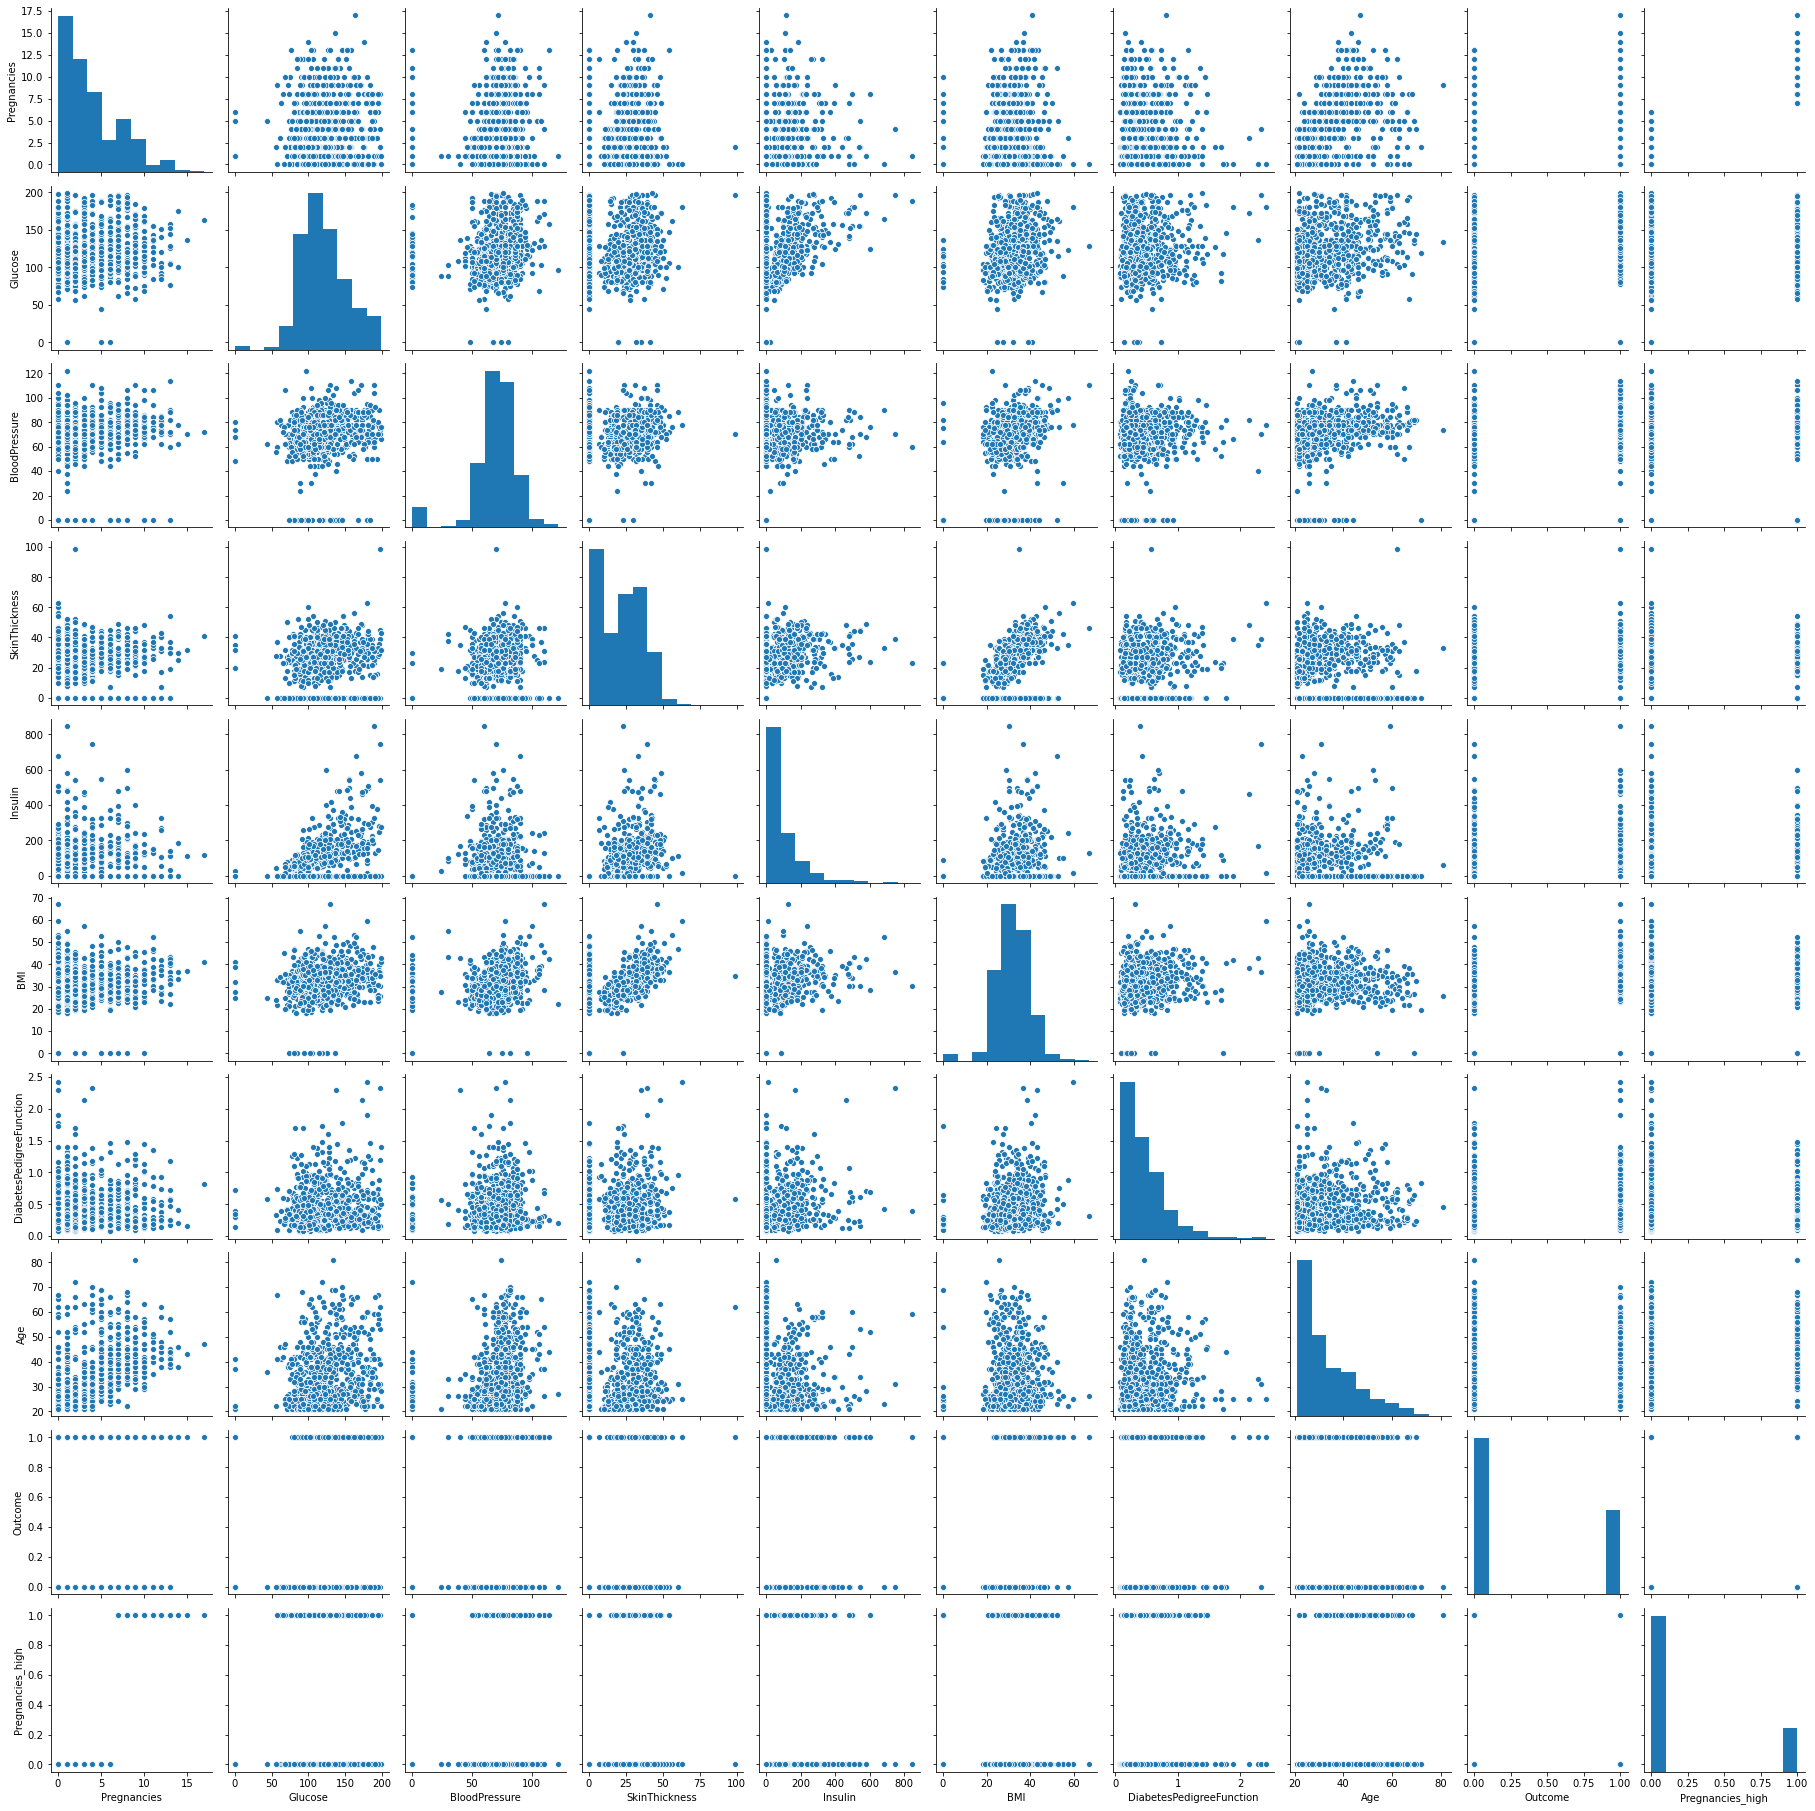

In [99]:
sns.pairplot(df)

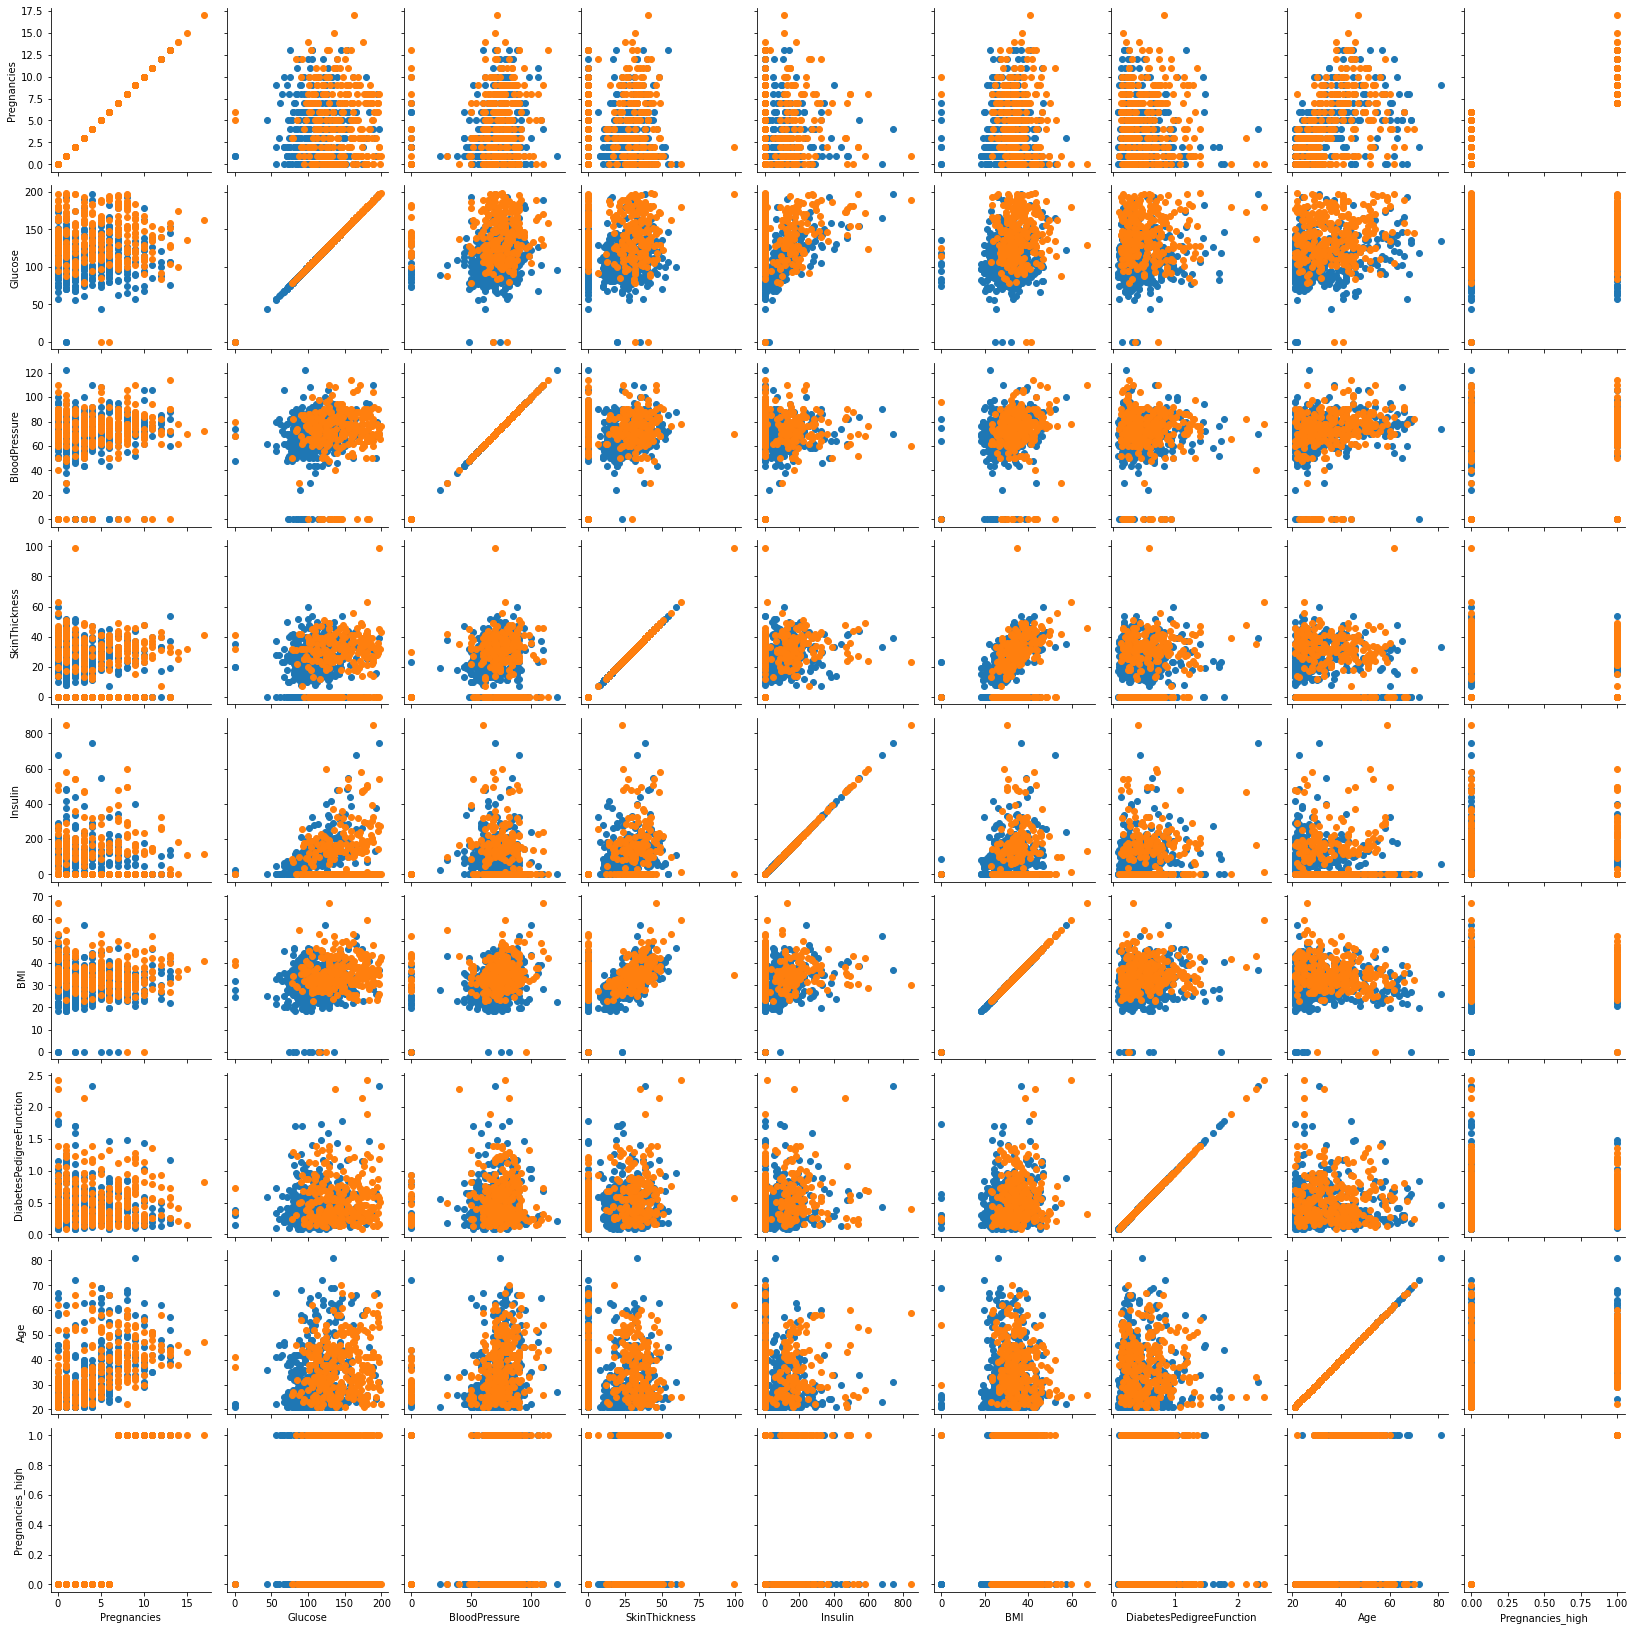

In [100]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

In [105]:
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


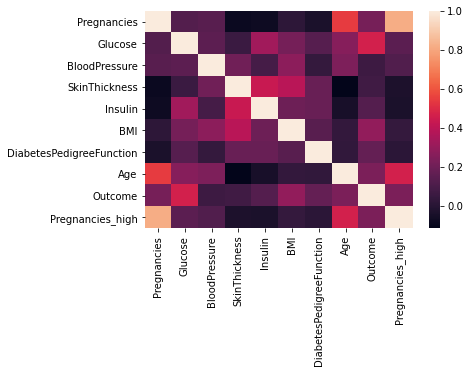

In [106]:
sns.heatmap(df_corr)

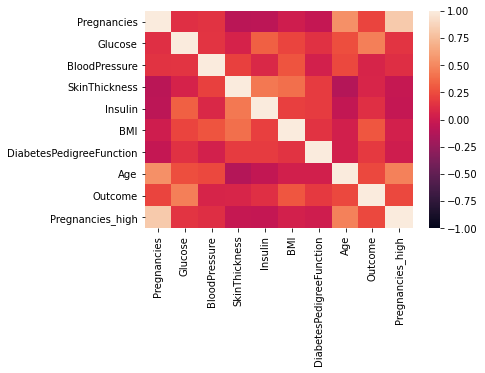

In [107]:
sns.heatmap(df_corr, vmax=1, vmin=-1) # limit max/min

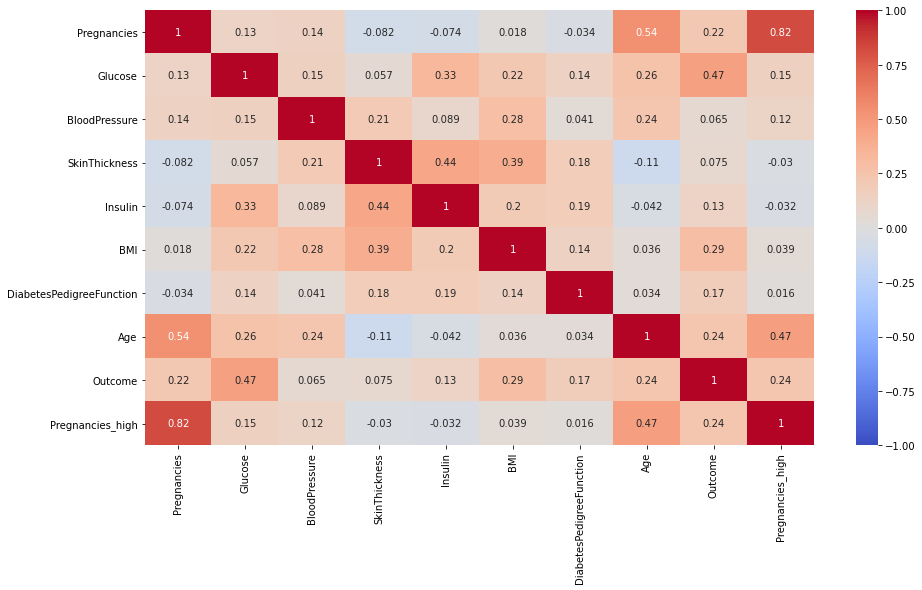

In [109]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [110]:
df.iloc[:, :-2].replace(0, np.nan)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [111]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [112]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [113]:
df_corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Pregnancies_high            0.237557
Name: Outcome, dtype: float64

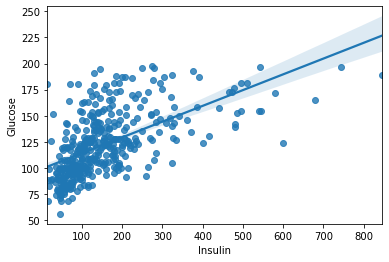

In [115]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

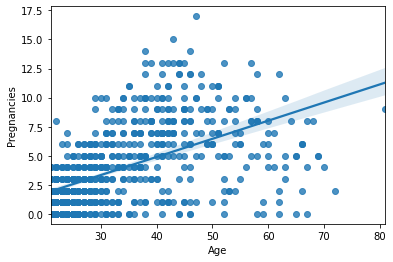

In [116]:
sns.regplot(data=df, x="Age", y="Pregnancies")

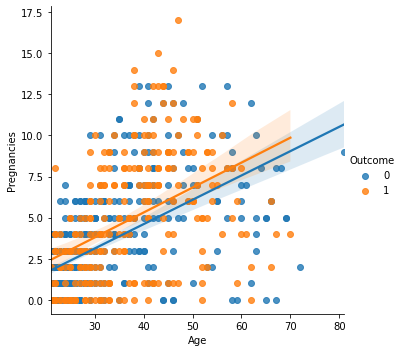

In [117]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

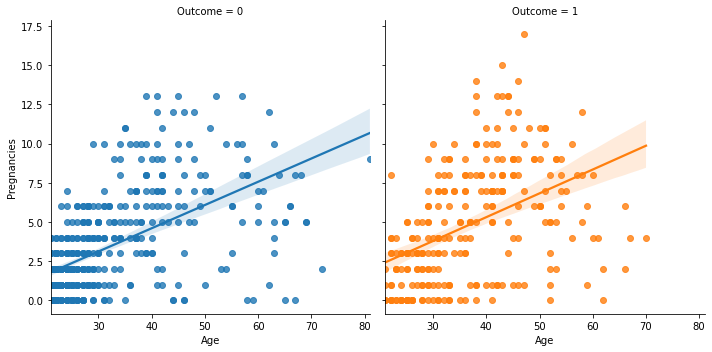

In [118]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")